## A multiclass Random Forest classifier using the 470-feature data set.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [2]:
df.head(n=2)

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1


In [3]:
df.keys()

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [4]:
len(df.index)

11598

In [5]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [6]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [7]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [8]:
features_train = scaler.transform(features_train)

In [9]:
dt_clf = RandomForestClassifier()
dt_clf.fit(features_train, y_train)

RandomForestClassifier()

In [10]:
cross_val_score(dt_clf, features_train, y_train, cv=5, scoring="accuracy", verbose=True)

array([0.94127155, 0.93696121, 0.94719828, 0.94986523, 0.94663073])

In [11]:
y_train_pred = cross_val_predict(dt_clf, features_train, y_train, cv=5)

In [12]:
confusion_matrix(y_train, y_train_pred)

array([[ 907,   12,   11,   28,   33],
       [  36, 1537,   26,   40,   37],
       [   2,   11, 3086,   11,    8],
       [  68,   30,   14, 1874,   60],
       [  23,   19,   24,   31, 1350]])

In [13]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [14]:
features_test = scaler.transform(features_test)

In [15]:
y_test_pred = cross_val_predict(dt_clf, features_test, y_test, cv=3)

In [16]:
confusion_matrix(y_test, y_test_pred)

array([[234,   7,   1,  12,   8],
       [ 22, 361,  14,  19,   8],
       [  2,  12, 769,   3,   0],
       [ 17,  15,   9, 446,  13],
       [ 12,   7,  15,  15, 299]])

In [17]:
multilabel_confusion_matrix(y_test, y_test_pred)

array([[[2005,   53],
        [  28,  234]],

       [[1855,   41],
        [  63,  361]],

       [[1495,   39],
        [  17,  769]],

       [[1771,   49],
        [  54,  446]],

       [[1943,   29],
        [  49,  299]]])

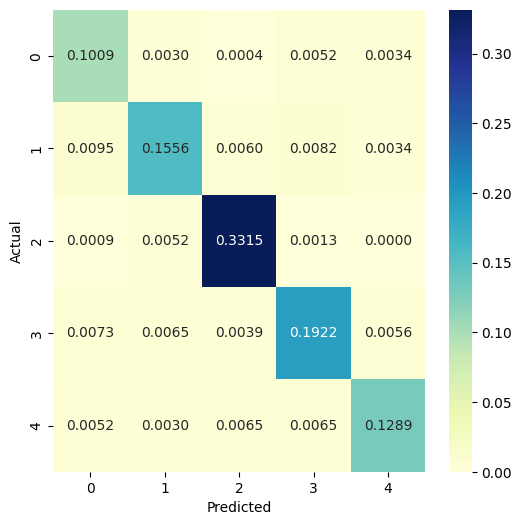

In [18]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [19]:
accuracy_score(y_test, y_test_pred)

0.909051724137931

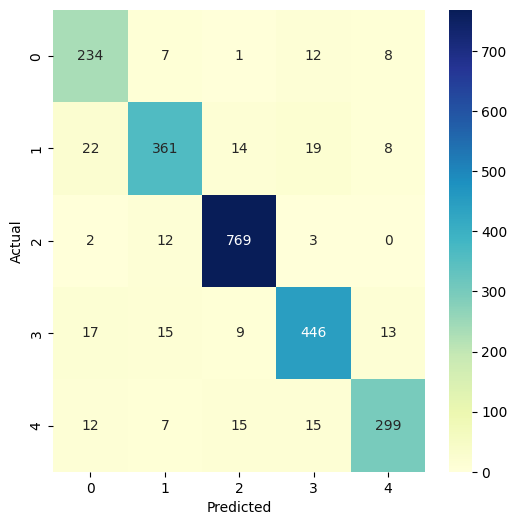

In [20]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)